In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../')

from getdata import *

from dipy.segment.tissue import TissueClassifierHMRF

In [3]:
N=0
d=1
dim=2
normalize=False
channels=3
drop=False

mdict = {0: 90, 1: 110, 2: 90}
m = mdict[dim]

df= get_csvdata(drop, drop)

#X = get_slices(df.iloc[0:5]['ID'], dim=dim, m=m, N=N, d=d, normalize=normalize)


In [13]:
img = get_3D_data([df.iloc[0]['ID']], normalize=False)[0]

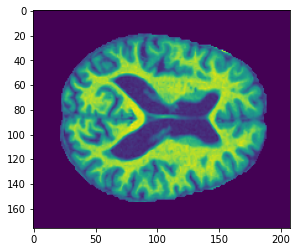

In [63]:
plt.imshow(img2[:,:,90])

In [62]:
img2 = (img/img.max()*255).astype(np.uint8)

In [84]:
hmrf = TissueClassifierHMRF(verbose=False)
initial_segmentation, final_segmentation, PVE = hmrf.classify(img2, 3, 0.1, 1e-5)

KeyboardInterrupt: 

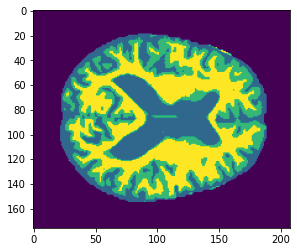

In [82]:
plt.imshow(seg3d[:,:,90])

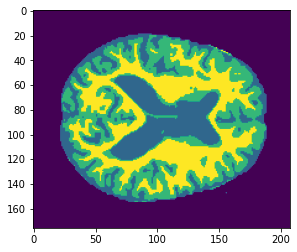

In [78]:
plt.imshow(seg2d)

In [39]:
np.count_nonzero(final_segmentation[:,:,90]==2)

13

In [85]:
from tqdm import tqdm

In [87]:
[i for i in tqdm(range(10))]

100%|██████████| 10/10 [00:00<?, ?it/s]


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [91]:
drop = False
df_o= get_csvdata(drop, drop)

df_o_train, df_o_test, y_o_train, y_o_test = train_test_split(df_o['ID'], df_o['label'], stratify=df_o['label'], random_state=42)

X_train_o = get_slices(df_o_train, dim=0, m=90, N=0, d=2, normalize=False)


In [112]:
X_train = np.repeat(X_train_o[..., np.newaxis], 1, -1)
X = X_train[191]
hmrf = TissueClassifierHMRF(verbose=False)
initial_segmentation, Xk, PVE = hmrf.classify(X, 3, 0.1)
X =  np.stack([(X==1).astype(int), (X==2).astype(int), (X==3).astype(int)], axis=-1)

In [105]:
X.shape

(208, 176)